## Red and White Wine Classification ##
https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009 <br>
https://www.kaggle.com/piyushagni5/white-wine-quality?select=winequality.names

Parameters:
 - Fixed Acidity. Most acids involved with wine or fixed or nonvolatile (do not evaporate readily).
 - Volatile Acidity. The amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.
 - Citric Acid. Found in small quantities, citric acid can add 'freshness' and flavor to wines.
 - Residual Sugar. The amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet.
 - Chlorides. The amount of salt in the wine.
 - Free Sulfur Dioxide. The free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine.
 - Total Sulfur Dioxide. Amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine.
 - Density. The density of water is close to that of water depending on the percent alcohol and sugar content.
 - pH. Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.
 - Sulphates. A wine additive which can contribute to sulfur dioxide gas (S02) levels, which acts as an antimicrobial and antioxidant.
 - Alcohol. The percent alcohol content of the wine.
 - Quality. Output variable (based on sensory data, score between 0 and 10).

Importing 'pandas', 'pandas_profiling' and 'numpy' to process the dataset.

In [30]:
import pandas as pd
import pandas_profiling
import numpy as np

Importing 'matplotlib', 'scipy.stats' and 'seaborn' to visualize the data.

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [32]:
red_wine_data = pd.read_csv("winequality-red.csv")
white_wine_data = pd.read_csv("winequality-white.csv")

### Correlation ###
Let us find the overall correlation between the different parameters in order to get a better idea about the relationship of similar parameters (such as 'citric acid' and 'fixed acidity') and to confirm our suspicions.

In [33]:
def CorrelationTable(data, title):
    # Compute the correlation matrix:
    pandas_correlation = data.corr()

    # Generating a mask for the upper triangle for a cleaner table:
    mask = np.triu(np.ones_like(pandas_correlation, dtype=bool))

    # Set up the matplotlib figure:
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap:
    cmap = sns.diverging_palette(20, 230, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio:
    sns.heatmap(pandas_correlation, mask=mask, cmap=cmap, vmax=.7, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

    # Title:
    plt.title(title)

    plt.show()

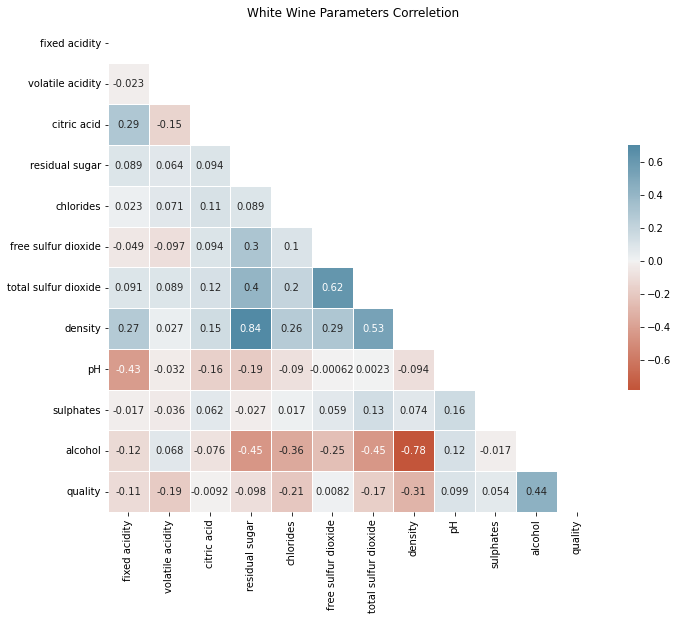

In [34]:
CorrelationTable(white_wine_data, 'White Wine Parameters Correletion')

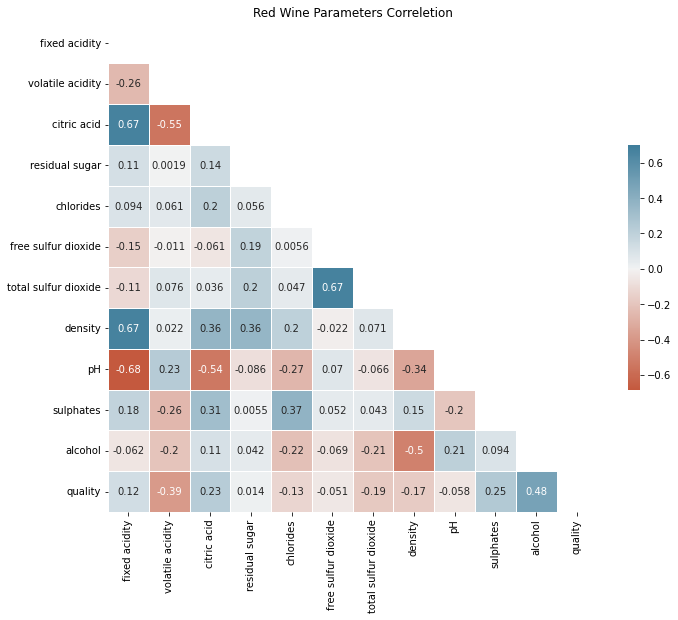

In [35]:
CorrelationTable(red_wine_data, 'Red Wine Parameters Correletion')

Lets use the Pandas Profile Report for a fast analyses:

In [36]:
red_profile = red_wine_data.profile_report(title="Red Wine Report")
red_profile.to_file(output_file="Red Wine Report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 43.48it/s]


In [37]:
white_profile = white_wine_data.profile_report(title="White Wine Report")
white_profile.to_file(output_file="White Wine Report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 38.48it/s]


### Lets Merge The Two ###

TODO: Use "data = data.drop(data.index[range(5)])" to make white whine's sample size similar to teh red's. (randomize it first)

In [38]:
red_wine_data['type'] = 1
white_wine_data['type'] = 0

wine_data = pd.concat([red_wine_data, white_wine_data], ignore_index=True).sample(frac=1)
wine_data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
2480,8.8,0.36,0.44,1.90,0.040,9.0,121.0,0.99530,3.19,0.48,9.9,6,0
5629,6.9,0.19,0.38,1.15,0.023,30.0,105.0,0.99047,3.11,0.38,11.4,5,0
1208,7.2,0.36,0.46,2.10,0.074,24.0,44.0,0.99534,3.40,0.85,11.0,7,1
3248,6.9,0.26,0.49,1.60,0.058,39.0,166.0,0.99650,3.65,0.52,9.4,4,0
2373,9.1,0.27,0.45,10.60,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9,0


### Starting prediction using Logistic Regression ###
First of all, we import all the important libaries.

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline
#sns.pairplot(wine_data)
#sns.scatterplot(x='volatile acidity',y='alcohol', data = red_wine_data)
#print(sns.scatterplot(x='fixed acidity', y='quality', data=wine_data))


Starting by making tables with logical relations.
(Simple differences between Whie/Red wine using general knowledge and wikipedia)

C:\Users\Tamir\AppData\Roaming\Python\Python39\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\Tamir\AppData\Roaming\Python\Python39\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical bottom == top == 1.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\Tamir\AppData\Roaming\Python\Python39\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])
C:\Users\Tamir\AppData\Roaming\Python\Python39\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expand

array([[<AxesSubplot:xlabel='fixed acidity', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='volatile acidity', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='citric acid', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='residual sugar', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='chlorides', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='free sulfur dioxide', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='total sulfur dioxide', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='density', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='pH', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='sulphates', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='alcohol', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='quality', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='type', ylabel='fixed acidity'>],
       [<AxesSubplot:xlabel='fixed acidity', ylabel='volatile acidity'>,
        <AxesSubplot:xlabel='volatile acidity',

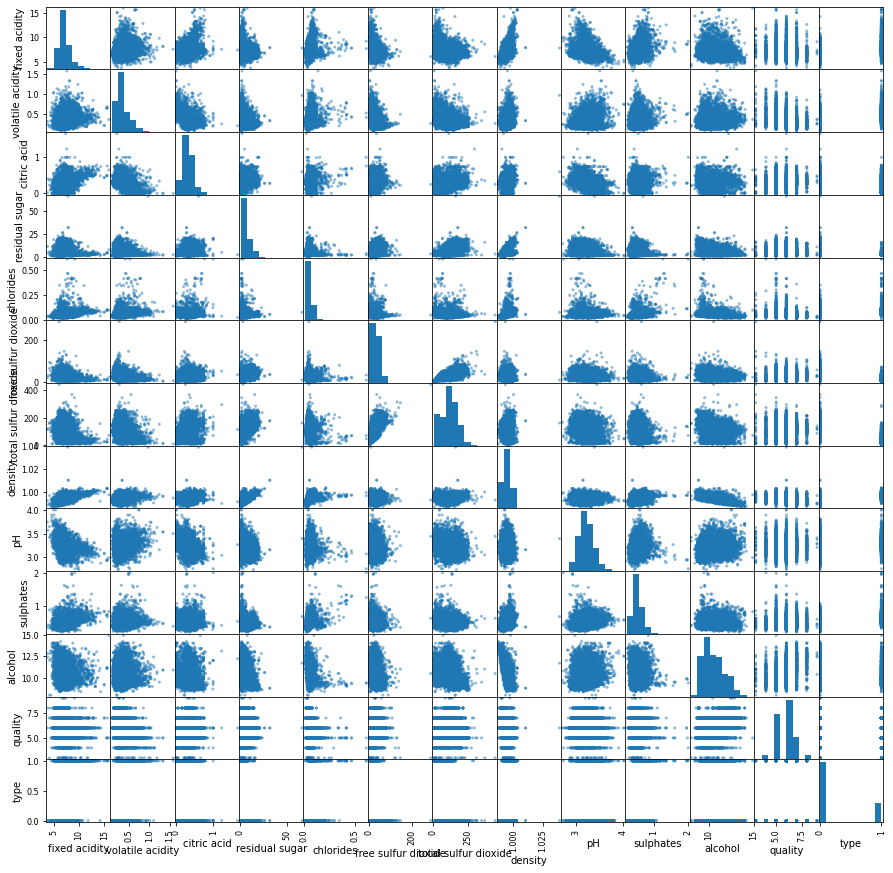

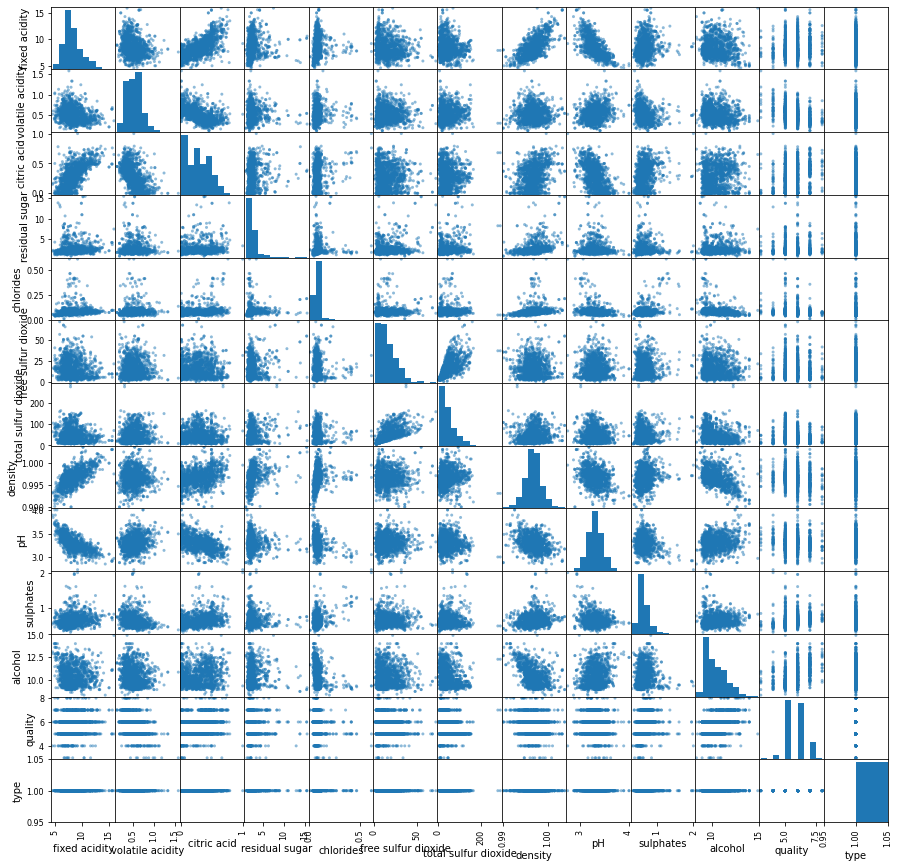

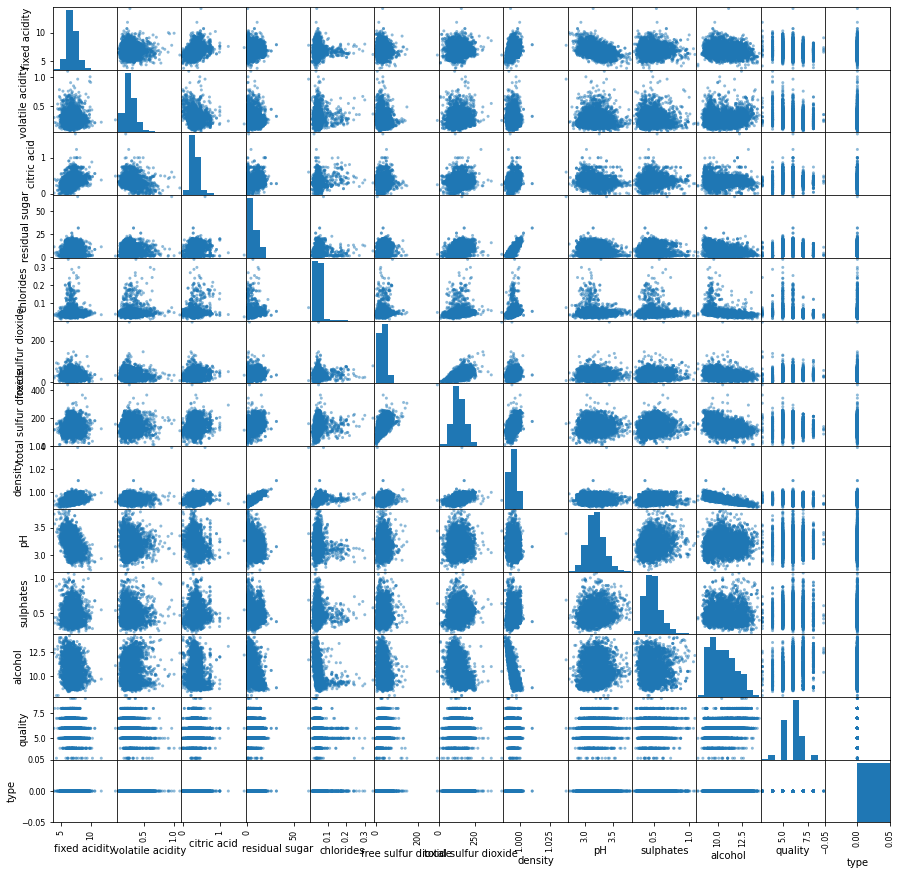

In [40]:
pd.plotting.scatter_matrix(wine_data, figsize = (15,15))
pd.plotting.scatter_matrix(red_wine_data, figsize = (15,15))
pd.plotting.scatter_matrix(white_wine_data, figsize = (15,15))

<AxesSubplot:xlabel='volatile acidity', ylabel='alcohol'>

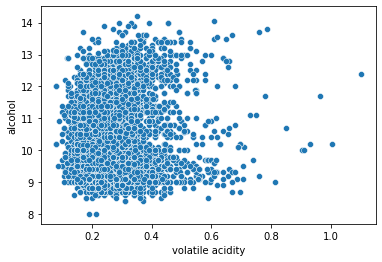

In [41]:
sns.scatterplot(x='volatile acidity',y='alcohol', data = white_wine_data)

<AxesSubplot:xlabel='fixed acidity', ylabel='quality'>

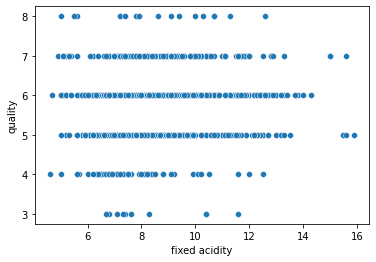

In [42]:
sns.scatterplot(x='fixed acidity', y='quality', data=red_wine_data)

<AxesSubplot:xlabel='fixed acidity', ylabel='quality'>

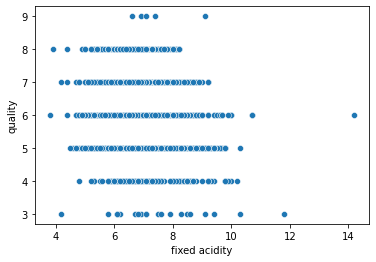

In [43]:
sns.scatterplot(x='fixed acidity', y='quality', data=white_wine_data)

<AxesSubplot:xlabel='fixed acidity', ylabel='type'>

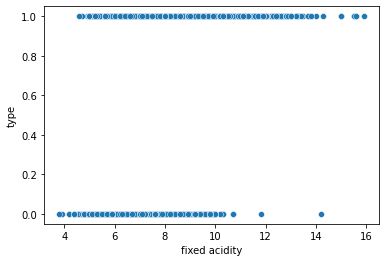

In [44]:
sns.scatterplot(x='fixed acidity', y='type', data=wine_data)

After realizing some of the connections and differences between red and white wine, we use a heatmap corrolation map in order to find exact corrolations.
(Rendering both the red wine heatmap and white wine heatmap)

<AxesSubplot:>

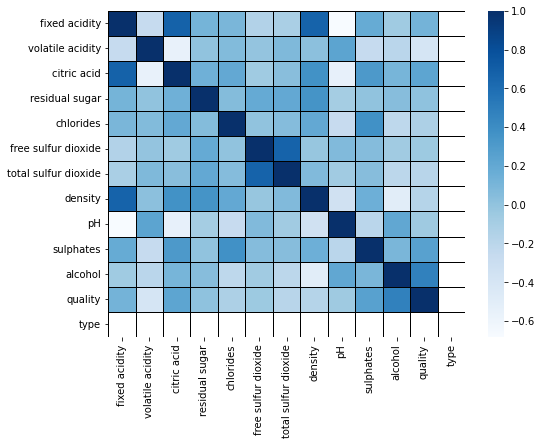

In [45]:
plt.figure(figsize=(8,6))
sns.heatmap(red_wine_data.corr(),cmap='Blues',linewidth=1,linecolor='Black')

<AxesSubplot:>

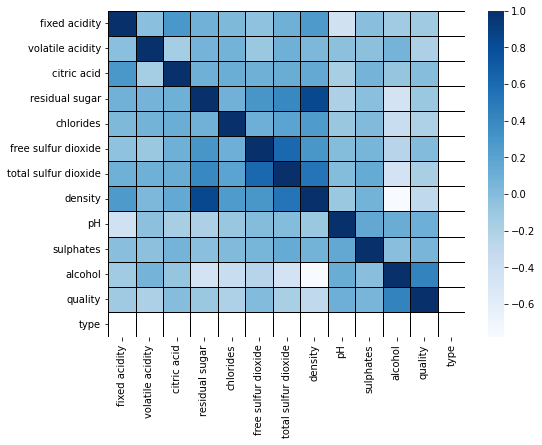

In [46]:
plt.figure(figsize=(8,6))
sns.heatmap(white_wine_data.corr(),cmap='Blues',linewidth=1,linecolor='Black')

### Building the model ###
We get rid of quality and type.<br>
<br>Quality because its subjective and doesn't connect in any way to our prediction.
<br>Type because we dont want the model to know what type of wine it is, before the prediction.
<br><br>
We will build 3 models.<br>
1 model with a non-balanced model.<br>
1 model with a balanced dataset using the class_weight function in the LogisticRegression function from sklearn.<br>
1 model with a balanced dataset using the StandardScaler function from sklearn.preprocessing function.<br>


In [47]:
x_unbalanced=wine_data.drop(['quality','type'],axis=1)
y_unbalanced=wine_data['type']

In [48]:
from sklearn.model_selection import train_test_split
x_unbalanced_train, x_unbalanced_test, y_unbalanced_train, y_unbalanced_test =train_test_split(x_unbalanced,y_unbalanced,test_size=0.20,random_state=42)

In [49]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(x_unbalanced_train , y_unbalanced_train)
PredictNoBalance = model.predict(x_unbalanced_test)
score = model.score(x_unbalanced_test,y_unbalanced_test)
print(score)


0.9892307692307692


In [50]:
from sklearn.m
print(classification_report(y_unbalanced_test, PredictNoBalance))

SyntaxError: invalid syntax (751214889.py, line 1)

### End of model 1 - Unbalanced model <br>
While this model looks good, it is VERY VERY BAD AND INACCURATE.<br>
In this particular run, we actually got samples from both red and white wine.<br>
However, because it is random there might be a run where it will only get samples from white wine/red wine which will create an inaccurate prediction.<br>

In [ ]:
x_reg_balance=wine_data.drop(['quality','type'],axis=1)
y_reg_balance=wine_data['type']

In [ ]:
from sklearn.model_selection import train_test_split
x_reg_balance_train, x_reg_balance_test, y_reg_balance_train, y_reg_balance_test = train_test_split(x_reg_balance,y_reg_balance,test_size=0.20,random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(class_weight='balanced',solver='lbfgs', max_iter=1000)
model.fit(x_reg_balance_train , y_reg_balance_train)
PredictRegBalance = model.predict(x_reg_balance_test)

model.score(x_reg_balance_test,y_reg_balance_test)

0.9830769230769231

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_reg_balance_test, PredictRegBalance))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       984
           1       0.96      0.97      0.97       316

    accuracy                           0.98      1300
   macro avg       0.98      0.98      0.98      1300
weighted avg       0.98      0.98      0.98      1300



### End of model 2 - balanced model using the "class_weight" argument in logisticregression <br>
This model is actually really good!<br>
The data is balanced, and the predictions are quite good.<br>
However, it can be EVEN better, with a better data balancing algorithm.<br>

In [51]:
x_scaler=wine_data.drop(['quality','type'],axis=1)
y_scaler=wine_data['type']

In [52]:
from sklearn.model_selection import train_test_split
x_normal_train, x_normal_test, y_normal_train, y_normal_test =train_test_split(x_scaler,y_scaler,test_size=0.20,random_state=42)

In [53]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
x_train_resampled,y_train_resampled = ros.fit_resample(x_normal_train,y_normal_train)


In [56]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='lbfgs', max_iter=1000)
fitted = model.fit(x_train_resampled,y_train_resampled)
predictBalance = model.predict(x_normal_test)
model.score(x_normal_test,y_normal_test)

0.9869230769230769

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_normal_test, predictBalance))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       989
           1       0.95      0.99      0.97       311

    accuracy                           0.99      1300
   macro avg       0.98      0.99      0.98      1300
weighted avg       0.99      0.99      0.99      1300



### End of model 3 - balanced model using the RandomOverSampler libary from imblearn<br>
By correcting our data using oversampling we can achieve a higher level of accuracy in the model.
This is the best model out of the bunch<br>
The data is balanced, and the predictions are almost perfect with a 99% score.<br>

### Time for some metrics!

### First let us make an ROC curve
We can see that the curve starts at 0.9~ and only goes up.

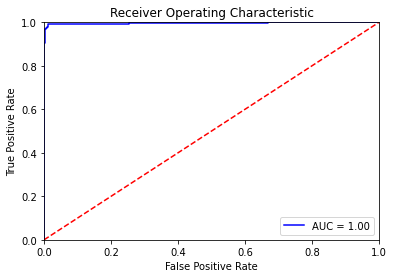

In [58]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
import matplotlib.pyplot as plt
probs = model.predict_proba(x_normal_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_normal_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Dummy models!<br>

Here we run dummy models in order to sanity check our results.<br>
we see that unsuprisingly the first dummy model "most_frequent" gets a constant result of 0.75%<br>
This is easily explained by the fact that we have 5x more red wine samples than white wine.<br>
<br>
The second dummy model, "stratified" is abit more complex.<br>
However it gives even worse results than the first model and it isn't constant.<br>

In [59]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(x_normal_train, y_normal_train)
y_predict = dummy_clf.predict_proba(x_normal_test)
dummy_score = dummy_clf.score(x_normal_test, y_normal_test)
print(dummy_score)

dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(x_normal_train, y_normal_train)
y_predict = dummy_clf.predict_proba(x_normal_test)
dummy_score = dummy_clf.score(x_normal_test, y_normal_test)
print(dummy_score)


0.7607692307692308
0.6123076923076923


### For fun lets try a few more algorithms<br>

All algorithms were run on the UNBALANCED dataset.<br>
suprisingly while Naive Bayes and Adaboostclassifier (which is also just a boost classifier) ran very well despite not being optimised for unbalanced datasets.<br>
Another suprising result is that of SVM, which is an algorithm with a tendecy to be more accurate in non-balanced datasets.<br>

In [60]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

models = []
models.append(('SVM:',SVC()))
models.append(("Naive Bayes:",GaussianNB()))
models.append(("Decision Tree:",DecisionTreeClassifier()))
models.append(("eXtreme Gradient Boost:",XGBClassifier()))
models.append(("AdaBoostClassifier:",AdaBoostClassifier()))

results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10)
    cv_result = cross_val_score(model,x_normal_train,y_normal_train.values.ravel(), cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean()*100)

#MORE!!!!!




C:\Users\Tamir\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Tamir\AppData\Roaming\Python\Python39\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Tamir\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

[04:42:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:42:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Tamir\AppData\Roaming\Python\Python39\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Tamir\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Tamir\AppData\Roaming\Python\Python39\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype in

[04:42:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:42:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Tamir\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Tamir\AppData\Roaming\Python\Python39\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Tamir\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

[04:42:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:42:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Tamir\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Tamir\AppData\Roaming\Python\Python39\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Tamir\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

[04:42:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Tamir\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Tamir\AppData\Roaming\Python\Python39\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Tamir\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

[04:42:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:42:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Tamir\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Tamir\AppData\Roaming\Python\Python39\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[04:42:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
SVM: 93.45801837853863
Naive Bayes: 96.99862902030532
Decision Tree: 98.48002816066399
eXtreme Gradient Boost: 99.49974062546316
AdaBoostClassifier: 99.23036164221136
